In [3]:
#importing necessary libraries

import pandas as pnd
import numpy as nmpy
import matplotlib.pyplot as matplotl
import seaborn as seabn
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [4]:
mall_cust_data=pnd.read_csv('Mall_Customers.csv')

In [5]:
mall_cust_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
mall_cust_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
mall_cust_data.shape

(200, 5)

In [8]:
mall_cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
mall_cust_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Text(0, 0.5, 'Count of Annual income')

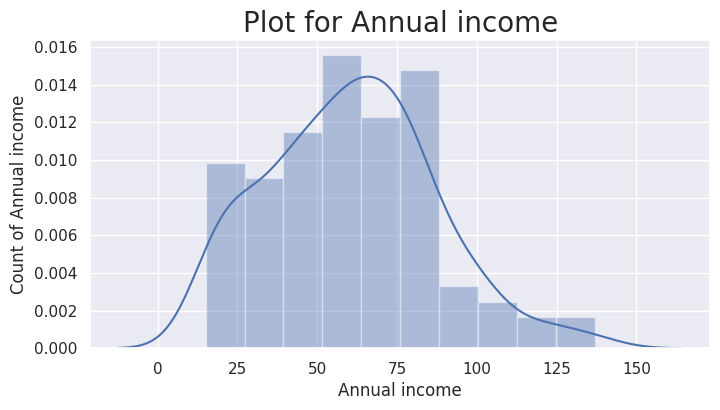

In [10]:
# Distribution plot for Annual Income (k$)

matplotl.figure(figsize=(8,4))
seabn.set(style='darkgrid')
seabn.distplot(mall_cust_data['Annual Income (k$)'])
matplotl.title('Plot for Annual income',fontsize=20)
matplotl.xlabel('Annual income')
matplotl.ylabel('Count of Annual income')

In the above plot we can see that the income is mostly between 50k and 80k


Text(0, 0.5, 'Count of age ')

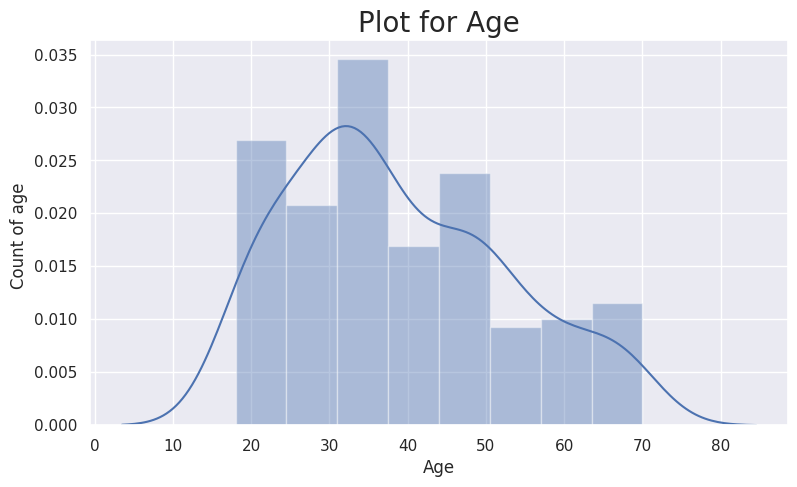

In [11]:
# Distrbution plot for Age

matplotl.figure(figsize=(9,5))
seabn.set(style='darkgrid')
seabn.distplot(mall_cust_data['Age'])
matplotl.title('Plot for Age',fontsize=20)
matplotl.xlabel('Age')
matplotl.ylabel('Count of age ')



*   Age group near 30-40 have the highest density





Text(0, 0.5, 'Count of Spending score')

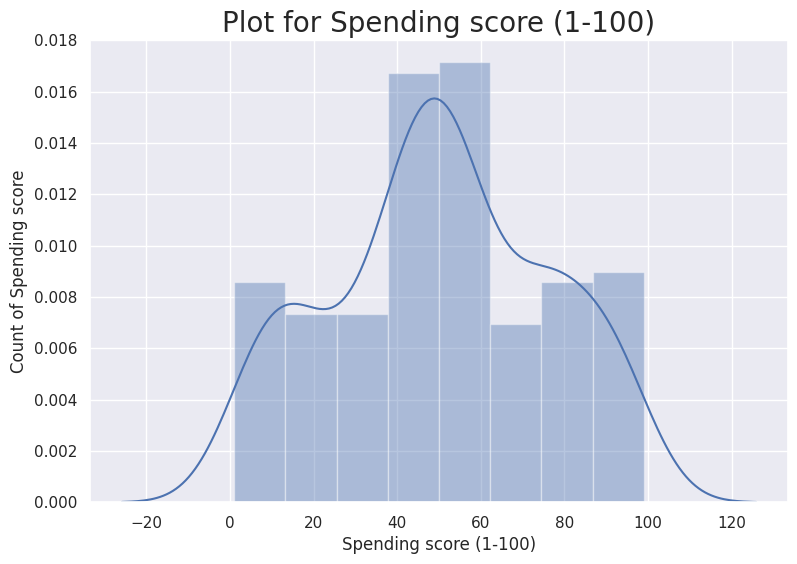

In [12]:
# Distribution plot for Spending Score (1-100)

matplotl.figure(figsize=(9,6))
seabn.set(style='darkgrid')
seabn.distplot(mall_cust_data['Spending Score (1-100)'])
matplotl.title('Plot for Spending score (1-100)',fontsize=20)
matplotl.xlabel('Spending score (1-100)')
matplotl.ylabel('Count of Spending score')

*   We can see from the above plot that the maximum spending score is in the range of 40 to 60



<Axes: >

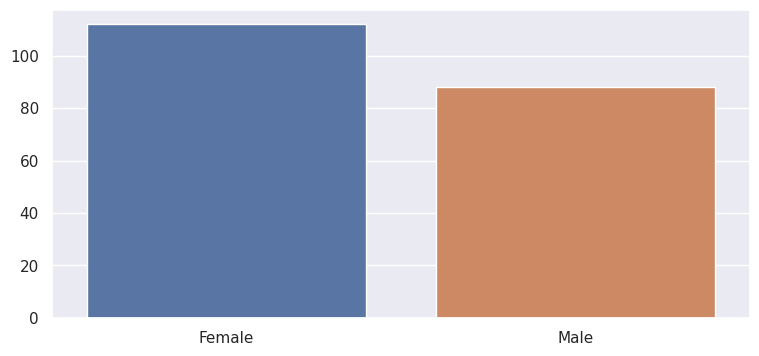

In [13]:
#Bar plot for gender distribution

gender_data=mall_cust_data.Gender.value_counts()
seabn.set_style('darkgrid')
matplotl.figure(figsize=(9,4))
seabn.barplot(x=gender_data.index, y=gender_data.values)

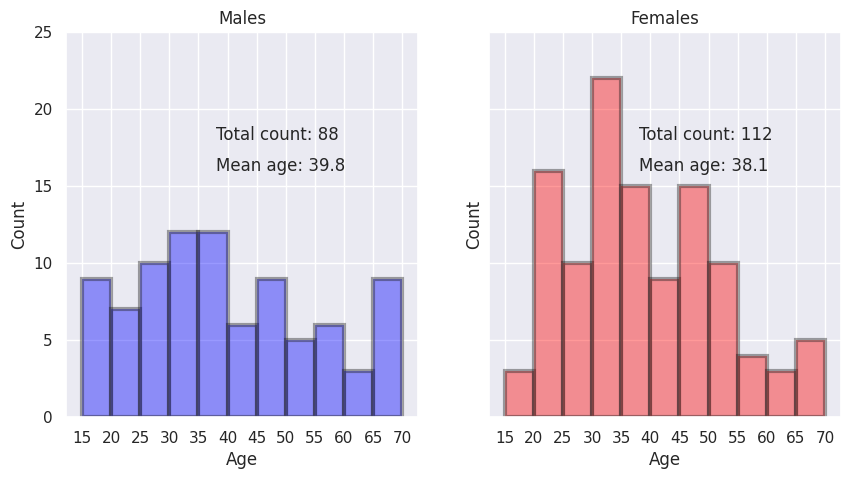

In [14]:
gen_male_age = mall_cust_data[mall_cust_data['Gender']=='Male']['Age'] # subset with males age
gen_female_age = mall_cust_data[mall_cust_data['Gender']=='Female']['Age'] # subset with females age

gen_age_bins = range(15,75,5)

#hist plot for men
fig2, (ax1, ax2) = matplotl.subplots(1, 2, figsize=(10,5), sharey=True)
seabn.distplot(gen_male_age, bins=gen_age_bins, kde=False, color='blue', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=3))
ax1.set_xticks(gen_age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(38,18, "Total count: {}".format(gen_male_age.count()))
ax1.text(38,16, "Mean age: {:.1f}".format(gen_male_age.mean()))

#hist plot for women
seabn.distplot(gen_female_age, bins=gen_age_bins, kde=False, color='red', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=3))
ax2.set_xticks(gen_age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(38,18, "Total count: {}".format(gen_female_age.count()))
ax2.text(38,16, "Mean age: {:.1f}".format(gen_female_age.mean()))

matplotl.show()

# DBSCAN Algorithm

## Annual Income and Spending Score

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_sp_an = mall_cust_data.iloc[:, [3,4]]
df_norm = scaler.fit_transform(data_sp_an)

In [16]:
DBS_clustering1 = DBSCAN(eps=0.09, min_samples=5).fit(df_norm)
DBSCAN_clustered1 = df_norm.copy()
labels1 = DBS_clustering1.labels_
labels1

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0,  1,  0,  2,  0,  2,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4, -1,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1,  3,  4,  3, -1,  3,  4,
       -1,  4,  3,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [17]:
unq_lbs, label_counts = nmpy.unique(labels1, return_counts=True)

# Now we can print the occurances for each label
for label, count in zip(unq_lbs, label_counts):
    print(f"Label {label}: {count} occurrences")

Label -1: 16 occurrences
Label 0: 18 occurrences
Label 1: 12 occurrences
Label 2: 96 occurrences
Label 3: 32 occurrences
Label 4: 26 occurrences


In [18]:
n_clusters1_ = len(set(labels1)) - (1 if -1 in labels1 else 0)
n_noise1_ = list(labels1).count(-1)
n_clusters1_

5

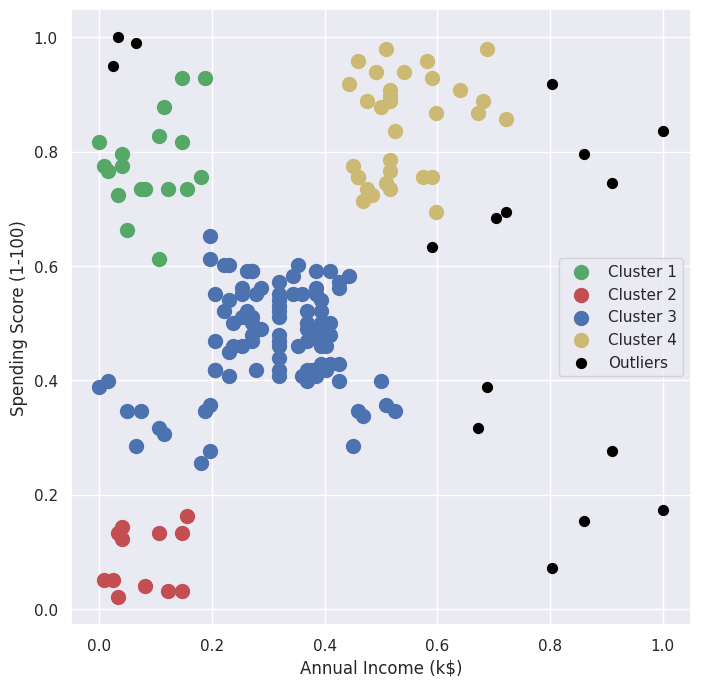

In [19]:
colors = ['g','r','b','y','burlywood','green', 'm', 'c']
matplotl.figure(figsize=(8,8))
for i in range(0 ,n_clusters1_ - 1):
    matplotl.scatter(df_norm[labels1 == i, 0], df_norm[labels1 == i, 1], s = 100, c = colors[i], label = 'Cluster ' + str(i + 1))
matplotl.scatter(df_norm[labels1 == -1, 0], df_norm[labels1 == -1, 1], s = 50, c = 'black', label = 'Outliers')
matplotl.xlabel('Annual Income (k$)')
matplotl.ylabel('Spending Score (1-100)')
matplotl.legend()

The above clusters can be explained as:

*   Cluster-1 --> low annual income and high spending score (Considerable)
*   Cluster-2 --> low annual income and low spending score (Sensible)
*   Cluster-3 --> medium annual income and medium spending score (Standard)
*   Cluster-4 --> high annual income and high spending score (Targeted)


In [20]:
#Customer ids
customerIDs=mall_cust_data['CustomerID'].values

In [21]:
# Create a dictionary to store customer IDs for each label
label_to_customer_ids = {}

# Iterate through labels and customer IDs
for i in range(len(customerIDs)):
    customer_id = customerIDs[i]
    label = labels1[i]
    if label in label_to_customer_ids:
        label_to_customer_ids[label].append(customer_id)
    else:
        label_to_customer_ids[label] = [customer_id]

# Print the customer IDs for each label
for label, customer_ids in label_to_customer_ids.items():
    print(f"Label {label}: {customer_ids}")

Label 2: [1, 5, 17, 19, 21, 27, 29, 39, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 127, 133, 143, 147, 161]
Label 0: [2, 4, 6, 10, 14, 16, 18, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42]
Label 1: [3, 7, 9, 11, 13, 15, 23, 25, 31, 33, 35, 37]
Label -1: [8, 12, 20, 170, 181, 185, 188, 192, 193, 194, 195, 196, 197, 198, 199, 200]
Label 3: [124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 172, 174, 176, 178, 180, 182, 184, 186, 190]
Label 4: [129, 131, 135, 137, 139, 141, 145, 149, 151, 153, 155, 157, 159, 163, 165, 167, 169, 171, 173, 175, 177, 179, 183, 187, 189, 191]


## Spending Score and Age

In [22]:
df_age_score = mall_cust_data.iloc[:, [False, False, True, False, True]].values

scaler = MinMaxScaler()
df_age_score_scaled=scaler.fit_transform(df_age_score)

In [23]:
df_age_score = mall_cust_data.iloc[:, [False, False, True, False, True]]
df_norm_age = scaler.fit_transform(df_age_score)

DBS_clustering_age = DBSCAN(eps=0.08, min_samples=5).fit(df_norm_age)
DBSCAN_clustered_age = df_norm_age.copy()
labels_age = DBS_clustering_age.labels_
labels_age

array([ 0,  0, -1,  0,  0,  0,  1,  0, -1,  0, -1,  0,  2,  0,  4,  0,  3,
        0, -1,  0,  3,  0,  4,  0,  2,  0,  3,  0,  3,  0,  2,  0, -1, -1,
        4,  0,  4,  0,  5,  0,  3,  0,  3,  0, -1,  0,  3,  0,  0,  0,  3,
        0,  0,  3,  3,  3,  3,  3,  0,  3,  3,  0,  3,  3,  3,  0,  3,  3,
        0,  0,  3,  3,  3,  3,  3,  0,  3,  3,  0,  3,  3, -1,  3,  3,  0,
        3, -1,  0,  0,  3,  3,  0,  3,  3,  0,  0,  3,  0,  3,  0,  0,  3,
        3,  0,  3,  0,  3,  3,  3,  3,  3,  0,  3,  0,  0,  0,  3,  3,  3,
        3,  0,  3, -1,  0, -1,  0,  3,  0,  2,  0,  4,  0, -1,  0, -1,  0,
        4,  0, -1,  0,  2,  0,  0,  0, -1,  0,  3,  0,  5,  0,  4,  0,  4,
        0,  4,  0,  1,  0,  1,  0, -1,  0, -1,  0, -1,  0,  4,  0,  5,  0,
        4,  0,  1,  0,  4,  0,  2,  0,  2,  0,  5,  0,  4,  0,  3,  0, -1,
        0,  4,  0,  5,  0,  1,  0,  4,  0,  3,  0,  5,  0])

In [25]:
unq_lbs_1, label_counts = nmpy.unique(labels_age, return_counts=True)

# We can see the occurances of differnet labels
for label, count in zip(unq_lbs_1, label_counts):
    print(f"Label {label}: {count} occurrences")

Label -1: 19 occurrences
Label 0: 92 occurrences
Label 1: 5 occurrences
Label 2: 7 occurrences
Label 3: 56 occurrences
Label 4: 15 occurrences
Label 5: 6 occurrences


In [26]:
n_clusters_age = len(set(labels_age)) - (1 if -1 in labels_age else 0)
n_noise_age_ = list(labels_age).count(-1)
n_clusters_age

6

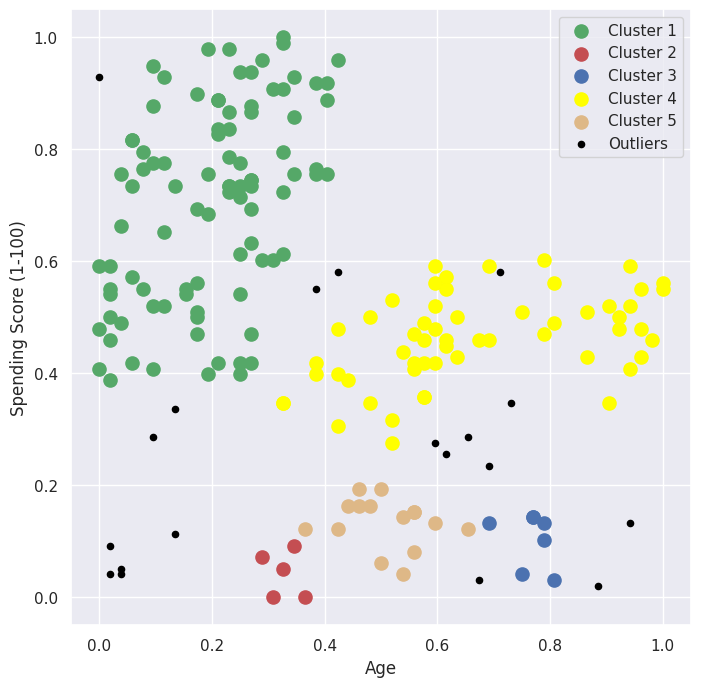

In [27]:
colors = ['g','r','b','yellow','burlywood','green', 'm', 'c']
matplotl.figure(figsize=(8,8))
for i in range(0 ,n_clusters_age - 1):
    matplotl.scatter(df_norm_age[labels_age == i, 0], df_norm_age[labels_age == i, 1], s = 90, c = colors[i], label = 'Cluster ' + str(i + 1))
matplotl.scatter(df_norm_age[labels_age == -1, 0], df_norm_age[labels_age == -1, 1], s = 20, c = 'black', label = 'Outliers')
matplotl.xlabel('Age')
matplotl.ylabel('Spending Score (1-100)')
matplotl.legend()

In [28]:
# Create a dictionary to store customer IDs for each label
label_to_customer_ids = {}

# Iterating through labels and customer IDs
for i in range(len(customerIDs)):
    customer_id = customerIDs[i]
    label = labels_age[i]
    if label in label_to_customer_ids:
        label_to_customer_ids[label].append(customer_id)
    else:
        label_to_customer_ids[label] = [customer_id]

# Print the customer IDs for each label
for label, customer_ids in label_to_customer_ids.items():
    print(f"Label {label}: {customer_ids}")

Label 0: [1, 2, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 36, 38, 40, 42, 44, 46, 48, 49, 50, 52, 53, 59, 62, 66, 69, 70, 76, 79, 85, 88, 89, 92, 95, 96, 98, 100, 101, 104, 106, 112, 114, 115, 116, 121, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 143, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200]
Label -1: [3, 9, 11, 19, 33, 34, 45, 82, 87, 123, 125, 133, 135, 139, 145, 161, 163, 165, 187]
Label 1: [7, 157, 159, 173, 193]
Label 2: [13, 25, 31, 129, 141, 177, 179]
Label 4: [15, 23, 35, 37, 131, 137, 151, 153, 155, 167, 171, 175, 183, 189, 195]
Label 3: [17, 21, 27, 29, 41, 43, 47, 51, 54, 55, 56, 57, 58, 60, 61, 63, 64, 65, 67, 68, 71, 72, 73, 74, 75, 77, 78, 80, 81, 83, 84, 86, 90, 91, 93, 94, 97, 99, 102, 103, 105, 107, 108, 109, 110, 111, 113, 117, 118, 119, 120, 122, 127, 147, 185, 197]
Label 5: [39, 149, 169, 181, 191, 199]
